In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuración de Rutas y Estilo ---
# Asegúrate de que la ruta relativa sea correcta desde donde ejecutas el notebook
reunion_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) 
results_dir = os.path.join(reunion_dir, 'resultados')
# CAMBIO: Cargamos los datos de la V4
path_analisis = os.path.join(results_dir, 'exp_analisis_fronteras_V4.csv') 

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Cargar el DataFrame
try:
    df_analisis = pd.read_csv(path_analisis, sep=';')
    print("¡Archivo de análisis V4 cargado exitosamente!")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en '{path_analisis}'. Asegúrate de haber ejecutado 'run_comparative_analysis_V4.py'.")

¡Archivo de análisis V4 cargado exitosamente!


# 🔍 Caracterización de la Frontera Política

## Contexto y Motivación
La **frontera política** representa el espacio de interacción entre clusters ideológicos opuestos. Identificar y caracterizar los nodos que habitan esta frontera nos permite entender:
- Quiénes son los **mediadores** entre grupos polarizados
- Cómo evoluciona la **comunicación inter-cluster** en el tiempo
- Qué actores mantienen **conexiones anómalas** (hacia el cluster opuesto)



c:\Users\benja\OneDrive\Desktop\Discovery-of-Cleavages\reunion 07\notebooks\analisis_frontera.py:267: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\benja\OneDrive\Desktop\Discovery-of-Cleavages\reunion 07\notebooks\analisis_frontera.py:267: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\benja\OneDrive\Desktop\Discovery-of-Cleavages\reunion 07\notebooks\analisis_frontera.py:267: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\benja\OneDrive\Desktop\Discovery-of-Cleavages\reunion 07\notebooks\analisis_frontera.py:267: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\benja\OneDrive\Desktop\Discovery-of-Cleavages\reunion 07\notebooks\analisis_frontera.py:267: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layou


📊 INTERPRETACIÓN DE LA VISUALIZACIÓN
📍 EJE X: Número absoluto de conexiones hacia el cluster opuesto
📍 EJE Y: Sesgo de equilibrio (qué tan balanceado está el nodo)
🟢 ZONA VERDE: Frontera real (sesgo equilibrado entre -0.3 y 0.3)
🔴 NODOS ROJOS: Originalmente del cluster Oficialismo
🔵 NODOS AZULES: Originalmente del cluster Oposición
⭕ TAMAÑO: Influencia ponderada en la frontera


C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\benja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) m

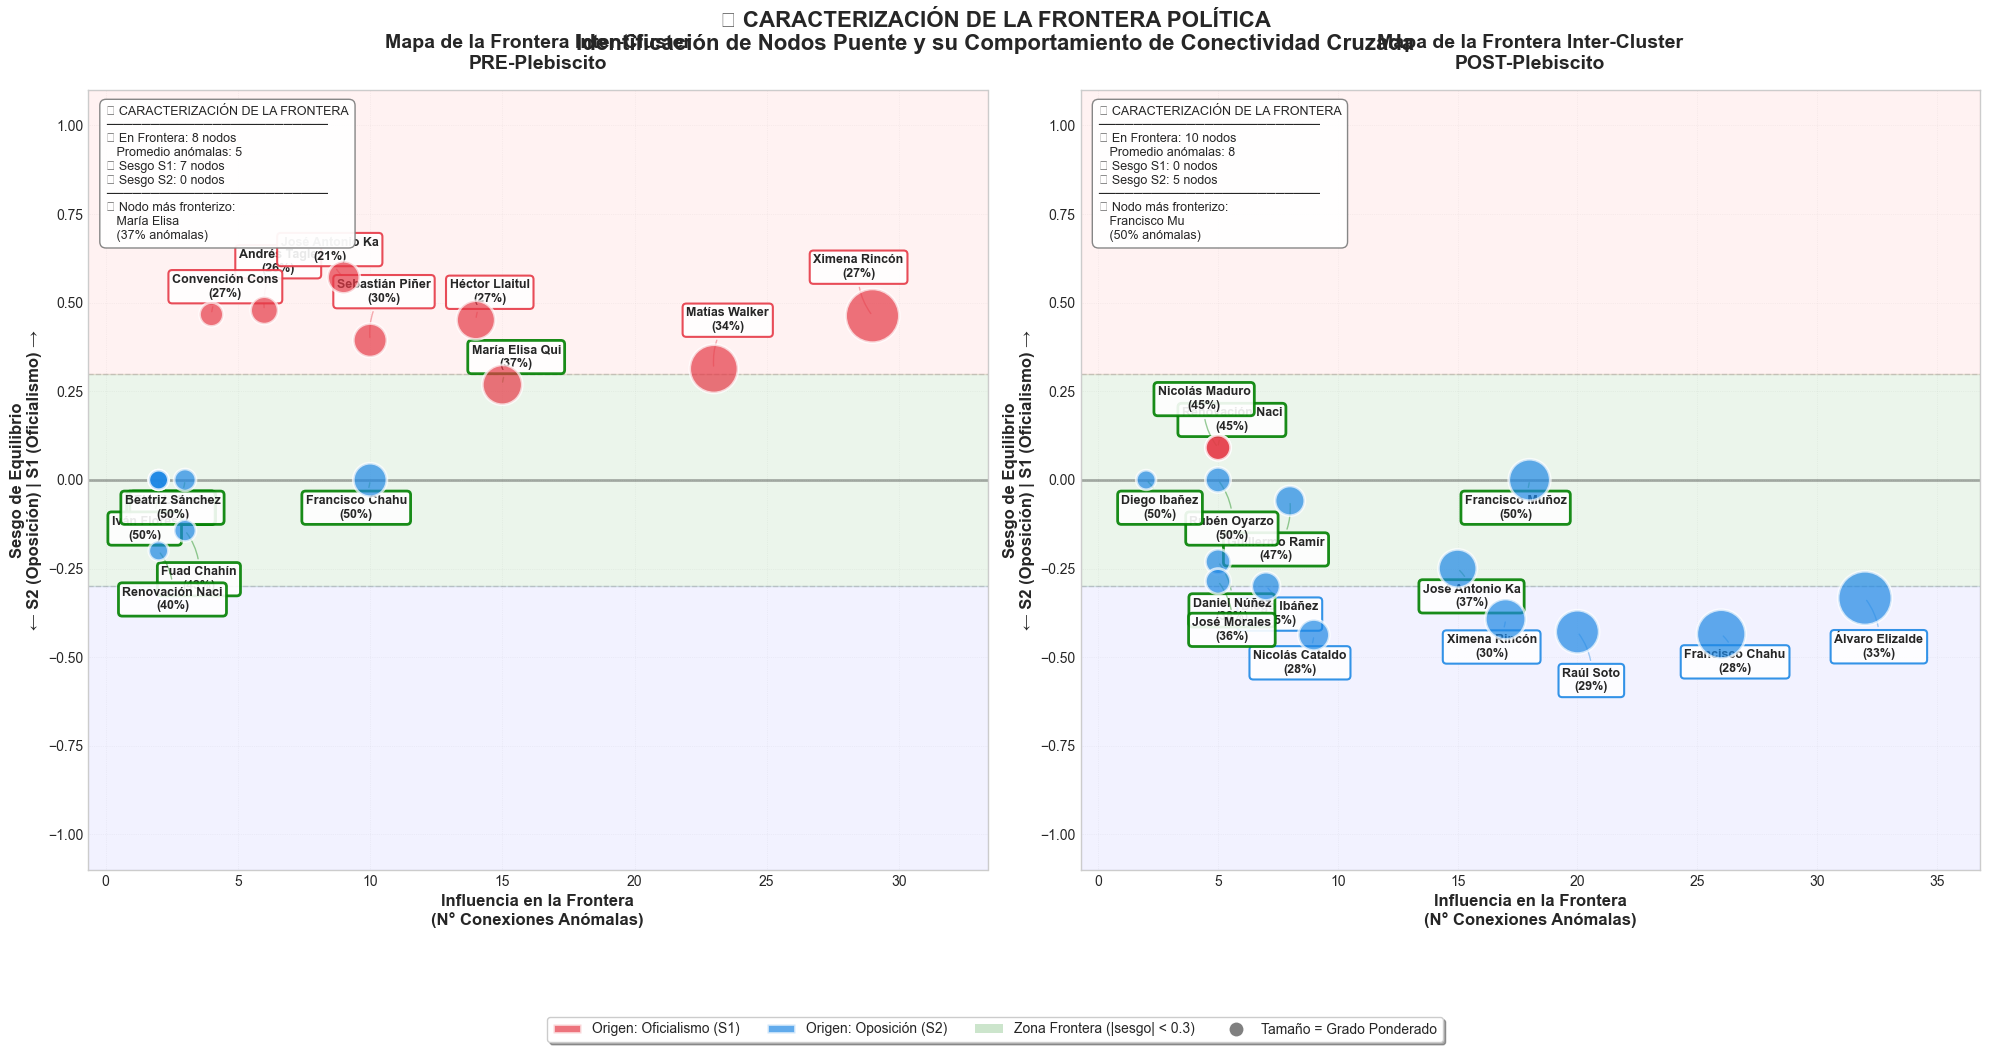

In [2]:
from analisis_frontera import analizar_nodos_frontera

# Usa ponderación por grado
fig = analizar_nodos_frontera(df_analisis, top_n=15, metrica_size='grado_ponderado')
plt.show()

# 📐 Fórmula del Sesgo de Equilibrio

## Definición Matemática

### Fórmula Principal

$$S_{eq}(v) = \frac{d_{C1}(v) - d_{C2}(v)}{d_{C1}(v) + d_{C2}(v)}$$

Donde:
- $S_{eq}(v)$ : Sesgo de equilibrio del nodo $v$
- $d_{C1}(v)$ : Grado del nodo $v$ hacia el cluster 1 (S1 - Oficialismo)
- $d_{C2}(v)$ : Grado del nodo $v$ hacia el cluster 2 (S2 - Oposición)

## Parámetros Explicados

### 1. **Grado hacia Cluster 1** - $d_{C1}(v)$
- **Definición**: Número de conexiones que el nodo $v$ tiene con nodos del cluster S1
- **Cálculo**: $d_{C1}(v) = |\{u \in C1 : (v,u) \in E\}|$
- **Interpretación**: Mide la conectividad con el oficialismo
- **Rango**: $[0, |C1|]$ donde $|C1|$ es el tamaño del cluster 1

### 2. **Grado hacia Cluster 2** - $d_{C2}(v)$
- **Definición**: Número de conexiones que el nodo $v$ tiene con nodos del cluster S2
- **Cálculo**: $d_{C2}(v) = |\{u \in C2 : (v,u) \in E\}|$
- **Interpretación**: Mide la conectividad con la oposición
- **Rango**: $[0, |C2|]$ donde $|C2|$ es el tamaño del cluster 2

### 3. **Denominador** - $d_{C1}(v) + d_{C2}(v)$
- **Definición**: Total de conexiones inter-cluster del nodo
- **Propósito**: Normaliza el sesgo independientemente del grado total
- **Caso especial**: Si es 0, el nodo no tiene conexiones (se asigna sesgo = 0)

### 2. **Métricas de Frontera Calculadas**

| Métrica | Fórmula | Interpretación |
|---------|---------|----------------|
| **Conexiones Anómalas** | `Enlaces hacia cluster opuesto` | Volumen absoluto de conectividad cruzada |
| **Proporción Anómala** | `Conexiones_Anomalas / Conexiones_Totales` | % de enlaces hacia el "otro lado" |
| **Sesgo de Equilibrio** | `(d_C1(v) - d_C2(v)) / (d_C1(v) + d_C2(v))` | Balance entre clusters (-1 a +1) |
| **Índice de Frontera** | `Proporcion_Anomala × log(1 + Conexiones_Anomalas)` | Combina volumen y proporción |
| **Score Frontera** | `0.4×Prop + 0.3×Vol_Norm + 0.3×(1-|Sesgo|)` | Métrica compuesta de fronterización |

### 3. **Clasificación de Nodos**
Según su Score de Frontera, los nodos se clasifican en:
- **Puente_Clave** (>0.7): Verdaderos mediadores con alta conectividad cruzada
- **Fronterizo** (0.5-0.7): Comportamiento fronterizo significativo
- **Moderado** (0.3-0.5): Alguna conectividad inter-cluster
- **Periférico** (<0.3): Poca actividad fronteriza

### 4. **Interpretación Visual**
- **Color**: Cluster original del nodo (🔴 S1 Oficialismo | 🔵 S2 Oposición)
- **Posición X**: Número de conexiones anómalas (influencia en la frontera)
- **Posición Y**: Sesgo de equilibrio (balance entre clusters)
- **Tamaño**: Influencia total ponderada
- **Zona Verde**: Frontera real (|sesgo| < 0.3)

## **Celda 2: Análisis de Métricas de Frontera**

# 📊 Análisis de Métricas de Frontera

## Función: `analizar_metricas_frontera()`

### Propósito
Genera un análisis exhaustivo de las métricas de frontera, clasificando automáticamente los nodos según su comportamiento de conectividad cruzada y produciendo recomendaciones sobre qué nodos son verdaderamente fronterizos.



In [3]:
from analisis_frontera import analizar_metricas_frontera

# Genera reporte con clasificación de nodos
df_metricas = analizar_metricas_frontera(df_analisis, exportar=True)

# Clasificación automática:
# - Puente_Clave: Score > 0.7 (verdaderos mediadores)
# - Fronterizo: Score 0.5-0.7 (alta conectividad cruzada)
# - Moderado: Score 0.3-0.5 (algo de conexión)
# - Periférico: Score < 0.3 (poca actividad fronteriza)


📊 ANÁLISIS DE MÉTRICAS DE FRONTERA

🕐 PLEBISCITO PRE
----------------------------------------

🏆 TOP 5 NODOS FRONTERA (Score Compuesto):

  1. 🔵 Francisco Chahuán
     • Score Frontera: 0.594
     • Tipo: Fronterizo
     • Proporción Anómala: 50.0%
     • Conexiones Anómalas: 10
     • Sesgo: +0.000

  2. 🔴 Matías Walker
     • Score Frontera: 0.559
     • Tipo: Fronterizo
     • Proporción Anómala: 34.3%
     • Conexiones Anómalas: 23
     • Sesgo: +0.313

  3. 🔴 Ximena Rincón
     • Score Frontera: 0.540
     • Tipo: Fronterizo
     • Proporción Anómala: 26.9%
     • Conexiones Anómalas: 29
     • Sesgo: +0.463

  4. 🔵 Begoña Yarza
     • Score Frontera: 0.528
     • Tipo: Fronterizo
     • Proporción Anómala: 50.0%
     • Conexiones Anómalas: 3
     • Sesgo: +0.000

  5. 🔵 Elsa Labraña
     • Score Frontera: 0.519
     • Tipo: Fronterizo
     • Proporción Anómala: 50.0%
     • Conexiones Anómalas: 2
     • Sesgo: +0.000

📈 DISTRIBUCIÓN POR TIPO DE FRONTERA:
   • Fronterizo: 19 nodo


### Métricas Calculadas

#### **Score Compuesto de Frontera**
Combina tres dimensiones clave con ponderación específica:
- **40%** → Proporción de conexiones anómalas (calidad de fronterización)
- **30%** → Volumen normalizado de conexiones (influencia absoluta)
- **30%** → Equilibrio de sesgo (neutralidad entre clusters)

### Output del Análisis

#### 1. **Clasificación Automática**
```
Puente_Clave    → Nodos con Score > 0.7 (mediadores críticos)
Fronterizo      → Nodos con Score 0.5-0.7 (alta conectividad cruzada)
Moderado        → Nodos con Score 0.3-0.5 (conectividad moderada)
Periférico      → Nodos con Score < 0.3 (baja actividad fronteriza)
```

#### 2. **Reporte por Período**
- **Top 5 Nodos Frontera**: Ranking por score compuesto
- **Métricas detalladas**: Proporción anómala, volumen, sesgo
- **Distribución por tipo**: Cantidad de nodos en cada categoría

#### 3. **Recomendaciones Interpretativas**
- Proporción anómala **>30%** indica comportamiento fronterizo real
- Score **>0.5** sugiere rol importante en comunicación inter-cluster
- Combinar volumen Y proporción da la mejor caracterización


## **Celda 3: Visualización Avanzada de Frontera**

# 🎨 Visualización Avanzada de la Frontera

## Función: `visualizar_frontera_avanzada()`

### Propósito
Crea una visualización que muestra la relación entre **proporción** y **volumen** de conectividad cruzada, permitiendo identificar diferentes tipos de comportamiento fronterizo.


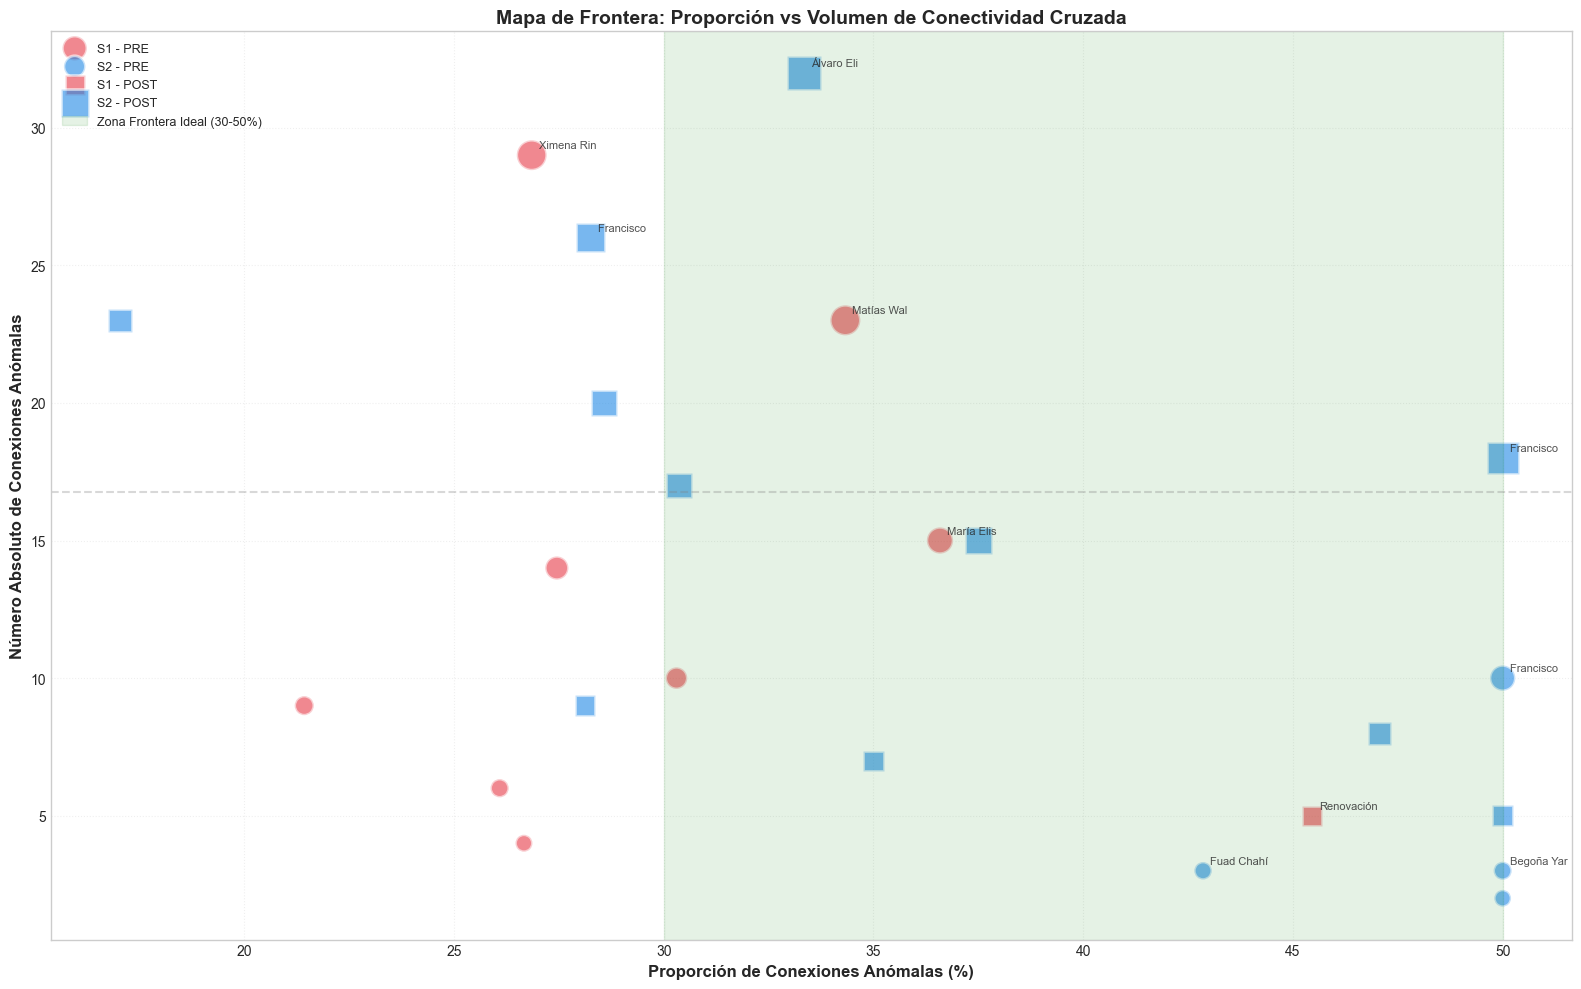

In [ ]:
from analisis_frontera import visualizar_frontera_avanzada

# Muestra proporción (%) vs volumen absoluto
fig = visualizar_frontera_avanzada(df_analisis, top_n=12)
plt.show()


### Interpretación del Gráfico

#### **Ejes**
- **Eje X**: Proporción de conexiones anómalas (%) - Qué tan "fronterizo" es el comportamiento
- **Eje Y**: Número absoluto de conexiones anómalas - Volumen de influencia

#### **Zonas de Interés**

| Zona | Proporción | Interpretación |
|------|------------|----------------|
| **Verde (30-50%)** | Zona Frontera Ideal | Verdaderos mediadores con balance genuino |
| **< 30%** | Partidistas con conexiones | Principalmente partidistas pero con algunos enlaces cruzados |
| **> 50%** | Ultra-fronterizos | Más conectados al cluster opuesto que al propio |

#### **Elementos Visuales**
- **Color**: Cluster original (🔴 S1 | 🔵 S2)
- **Forma**: Período (○ PRE | □ POST)
- **Tamaño**: Peso frontera (métrica compuesta)
- **Transparencia**: 60% para ver superposiciones

### Patrones a Buscar

#### 1. **"Verdaderos Puentes"** 
- Posición: Centro-derecha del gráfico
- Características: 30-50% proporción + alto volumen
- Ejemplo: Álvaro Elizalde POST

#### 2. **"Infiltrados"**
- Posición: Parte superior (>50% proporción)
- Características: Más enlaces al cluster opuesto
- Significado: Posible cambio de afiliación

#### 3. **"Conectores Partidistas"**
- Posición: Abajo-derecha (<30% proporción, alto volumen)
- Características: Muchas conexiones pero mayoría intra-cluster
- Ejemplo: Ximena Rincón

#### 4. **"Exploradores"**
- Posición: Centro-izquierda (30-50% proporción, bajo volumen)
- Características: Comportamiento fronterizo pero poca influencia


## **Celda 4: Comparación Temporal de Fronteras**

# 📈 Análisis Comparativo PRE vs POST Plebiscito

## Función: `comparar_periodos_frontera()`

### Propósito
Analiza la **evolución temporal** de la frontera política, identificando cambios en el comportamiento de conectividad cruzada entre los períodos PRE y POST plebiscito.



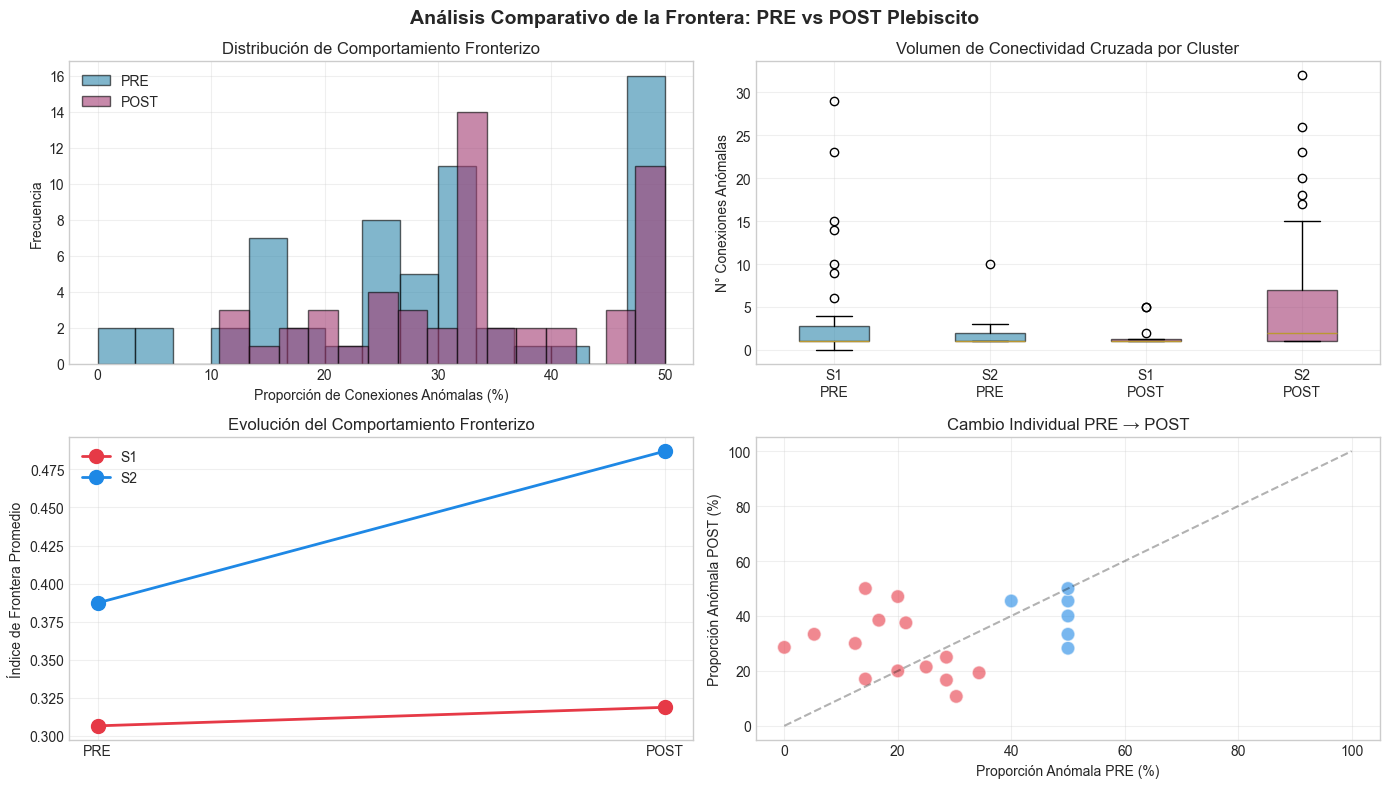

In [ ]:
from analisis_frontera import comparar_periodos_frontera

# Análisis completo PRE vs POST
fig = comparar_periodos_frontera(df_analisis)
plt.show()


### Visualizaciones Generadas

#### **Panel 1: Distribución de Comportamiento Fronterizo**
- **Histograma superpuesto** PRE vs POST
- **Interpretación**:
  - Desplazamiento derecha → Mayor fronterización
  - Concentración → Estandarización del comportamiento
  - Dispersión → Diversificación de estrategias

#### **Panel 2: Volumen por Cluster (Boxplot)**
- **Comparación** S1 vs S2 en cada período
- **Métricas mostradas**:
  - Mediana (línea central)
  - Rango intercuartílico (caja)
  - Outliers (puntos)
- **Interpretación**:
  - Outliers superiores = Super-conectores
  - Aumento en mediana = Fronterización general

#### **Panel 3: Evolución del Índice de Frontera**
- **Líneas de tendencia** por cluster
- **Interpretación**:
  - Pendiente positiva → Aumenta comportamiento fronterizo
  - Divergencia → Comportamiento diferenciado entre clusters
  - Convergencia → Homogenización

#### **Panel 4: Cambio Individual (Scatter)**
- **Cada punto** = Un nodo presente en ambos períodos
- **Diagonal** = Sin cambio
- **Interpretación**:
  - Sobre diagonal → Aumentó proporción anómala
  - Bajo diagonal → Se volvió más partidista
  - Distancia a diagonal → Magnitud del cambio

### Hallazgos Típicos

#### **Patrones POST-Plebiscito**
1. **Intensificación**: Aumento general de conexiones anómalas
2. **Polarización selectiva**: Algunos nodos se extreman, otros se moderan
3. **Asimetría cluster**: S2 (Oposición) típicamente más activa en frontera POST
4. **Emergencia de super-conectores**: Nodos con >30 conexiones anómalas

### Métricas de Cambio

| Métrica | Cálculo | Significado |
|---------|---------|-------------|
| **Δ Proporción** | `Prop_POST - Prop_PRE` | Cambio en % anómalo |
| **Δ Volumen** | `Vol_POST - Vol_PRE` | Cambio absoluto |
| **Δ Índice** | `Índice_POST - Índice_PRE` | Cambio en fronterización |

### Interpretación Política
- **Aumento fronterización** → Mayor diálogo inter-cluster
- **Disminución** → Polarización y cierre de filas
- **Cambios asimétricos** → Estrategias diferenciadas por cluster
